In [1]:
# !mv covid19-cuba.json covid19-cuba.json-old
# !wget http://www.cusobu.nat.cu/covid/data/covid19-cuba.json

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt # Graphics

sns.set_style('darkgrid')

#### Carga de datos

In [3]:
import json

In [4]:
data = json.load(open('covid19-cuba.json'))

In [5]:
data['schema-version']

5

#### Diagnosticados

In [6]:
# Cantidad diagnosticados por dia
diagnosticados = []

for k in range(1, len(data['casos']['dias'].keys())+1):
    try: 
        diagnosticados.append(len(data['casos']['dias'][str(k)]['diagnosticados']))
    except: 
        diagnosticados.append(0)

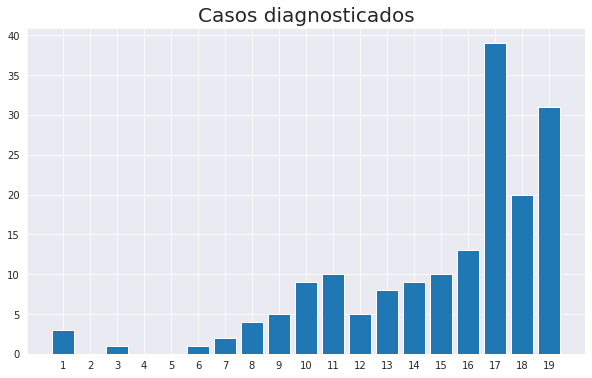

In [7]:
plt.figure(figsize=(10,6))
plt.title('Casos diagnosticados', fontsize=20)
plt.bar([str(k) for k in range(1, len(data['casos']['dias'].keys())+1)], diagnosticados)
plt.show()

In [8]:
# Total Diagnosticados
sum(diagnosticados)

170

#### Recuperados

In [9]:
# Cantidad recuperados por dia
recuperados = []

for k in range(1, len(data['casos']['dias'].keys())+1):
    try: 
        recuperados.append(data['casos']['dias'][str(k)]['recuperados_numero'])
    except: 
        recuperados.append(0)

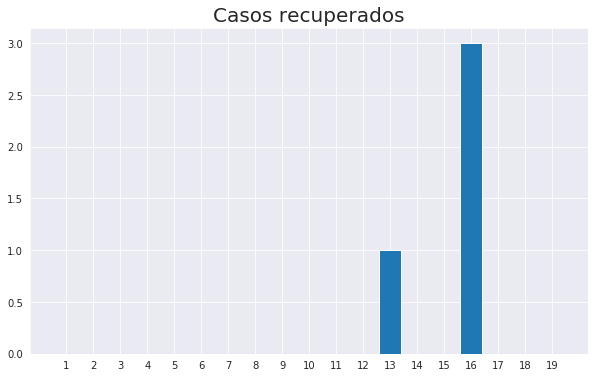

In [10]:
plt.figure(figsize=(10,6))
plt.title('Casos recuperados', fontsize=20)
plt.bar([str(k) for k in range(1, len(data['casos']['dias'].keys())+1)], recuperados)
plt.show()

In [11]:
# Total recuperados

sum(recuperados)

4

#### Evacuados

In [12]:
# Cantidad evacuados por dia
evacuados = []

for k in range(1, len(data['casos']['dias'].keys())+1):
    try: 
        evacuados.append(data['casos']['dias'][str(k)]['evacuados_numero'])
    except: 
        evacuados.append(0)

In [13]:
# Total evacuados
sum(evacuados)

1

#### Muertes

In [14]:
muertes = []

for k in range(1, len(data['casos']['dias'].keys())+1):
    try: 
        muertes.append(data['casos']['dias'][str(k)]['muertes_numero'])
    except: 
        muertes.append(0)

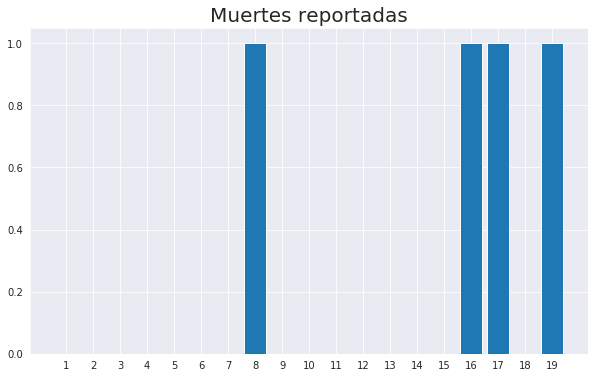

In [15]:
plt.figure(figsize=(10,6))
plt.title('Muertes reportadas', fontsize=20)
plt.bar([str(k) for k in range(1, len(data['casos']['dias'].keys())+1)], muertes)
plt.show()

In [16]:
# Total Muertes
sum(muertes)

4

#### Activos

In [17]:
activos = sum(diagnosticados) - (sum(recuperados) + sum(evacuados) + sum(muertes))
activos

161

#### Fecha

In [18]:
last_day = [k for k in data['casos']['dias'].keys()][-1]

In [19]:
data['casos']['dias'][last_day]['fecha']

'2020/03/29'

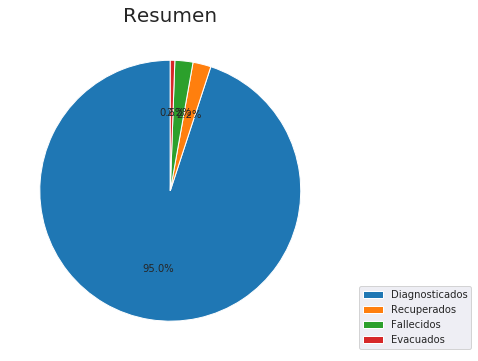

In [20]:
plt.figure(figsize=(10,6))
plt.title('Resumen', fontsize=20)
wedges, _, _  = plt.pie([sum(diagnosticados), sum(recuperados), sum(muertes), sum(evacuados)], autopct='%1.1f%%', startangle=90)
plt.legend(wedges, ['Diagnosticados', 'Recuperados', 'Fallecidos', 'Evacuados'], loc='lower center', bbox_to_anchor=(1,0,0.5,1))
plt.show()

In [21]:
last_day = [k for k in data['casos']['dias'].keys()][-1]
ingresados = data['casos']['dias'][last_day]['sujetos_riesgo']
ingresados

2681

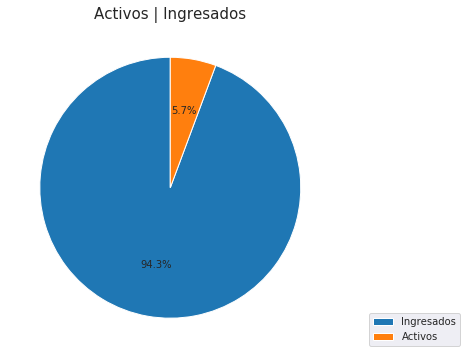

In [22]:
plt.figure(figsize=(10,6))
plt.title('Activos | Ingresados', fontsize=15)
wedges, _, _  = plt.pie([ingresados, activos], autopct='%1.1f%%', startangle=90)
plt.legend(wedges, ['Ingresados', 'Activos'], loc='lower center', bbox_to_anchor=(1,0,0.5,1))
plt.show()

#### Casos por sexo

In [23]:
labels = 'Mujeres', 'Hombres', 'No reportado'
hombres = 0
mujeres = 0
no_reportado = 0

In [24]:
for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            if caso['sexo'] == 'hombre':
                hombres += 1
            elif caso['sexo'] == 'mujer':
                mujeres += 1
            else:
                no_reportado += 1
    except:
        pass

In [25]:
hombres

92

In [26]:
mujeres

78

In [27]:
hombres + mujeres

170

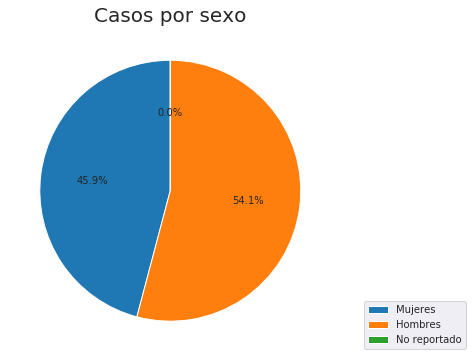

In [28]:
plt.figure(figsize=(10,6))
plt.title('Casos por sexo', fontsize=20)
wedges, _, _  = plt.pie([mujeres, hombres, no_reportado], autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels, loc='lower center', bbox_to_anchor=(1,0,0.5,1))
plt.show()

#### Casos por modo de contagio

In [29]:
from collections import defaultdict

In [30]:
modos = defaultdict(int)

for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            modos[caso['contagio']] += 1
    except:
        pass

In [31]:
labels = [str(k) for k in modos.keys()]

In [32]:
values = [v for v in modos.values()]

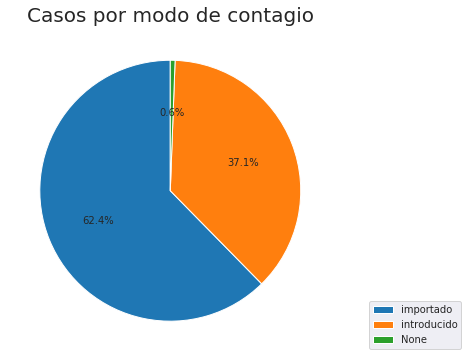

In [33]:
plt.figure(figsize=(10,6))
plt.title('Casos por modo de contagio', fontsize=20)
wedges, _, _  = plt.pie(values, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels, loc='lower center', bbox_to_anchor=(1,0,0.5,1))
plt.show()

#### Distribución por nacionalidad de casos extranjeros

In [34]:
paises = defaultdict(int)


for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            if caso['pais'] != 'cu':
                paises[caso['pais']] += 1
    except:
        pass

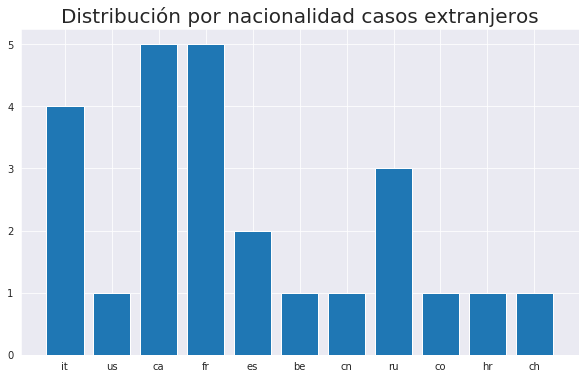

In [35]:
plt.figure(figsize=(10,6))
plt.title('Distribución por nacionalidad casos extranjeros', fontsize=20)
plt.bar([str(k) for k in paises.keys()], [v for v in paises.values()])
plt.show()

#### Casos por nacionalidad

In [36]:
labels = 'Cubanos', 'Extranjeros'
cubanos = 0
extranjeros = 0

In [37]:
for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            if caso['pais'] == 'cu':
                cubanos += 1
            else:
                extranjeros += 1
    except:
        pass

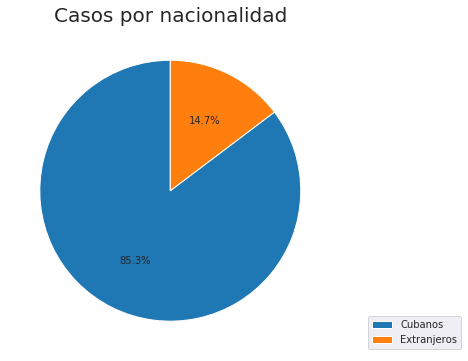

In [38]:
plt.figure(figsize=(10,6))
plt.title('Casos por nacionalidad', fontsize=20)
wedges, _, _  = plt.pie([cubanos, extranjeros], autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels, loc='lower center', bbox_to_anchor=(1,0,0.5,1))
plt.show()

#### Distribución por rangos etarios

In [39]:
edades = {'0-18': 0, '19-40': 0, '41-60': 0, '+60': 0}

for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            edad = caso['edad']
            
            if edad <= 18 :
                edades['0-18'] += 1
            elif edad >= 19 and edad <= 40:
                edades['19-40'] += 1
            elif edad >= 41 and edad <= 60:
                edades['41-60'] += 1
            else:
                edades['+60'] += 1
    except:
        pass

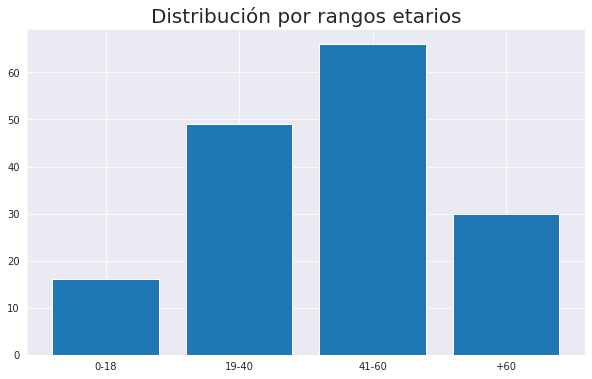

In [40]:
plt.figure(figsize=(10,6))
plt.title('Distribución por rangos etarios', fontsize=20)
plt.bar([str(k) for k in edades.keys()], [v for v in edades.values()])
plt.show()

#### Test acumulados por días

In [41]:
cant_tests = []

for k in range(12, len(data['casos']['dias'].keys())+1):
    cant_tests.append(data['casos']['dias'][str(k)]['tests_total'])

In [42]:
prop_test_vs_detected = []
detected_acc = []

for i, c in enumerate(cant_tests):
    detected_acc.append(sum(diagnosticados[:11+i]))
    prop_test_vs_detected.append(round(detected_acc[-1] / c, 2)*100)

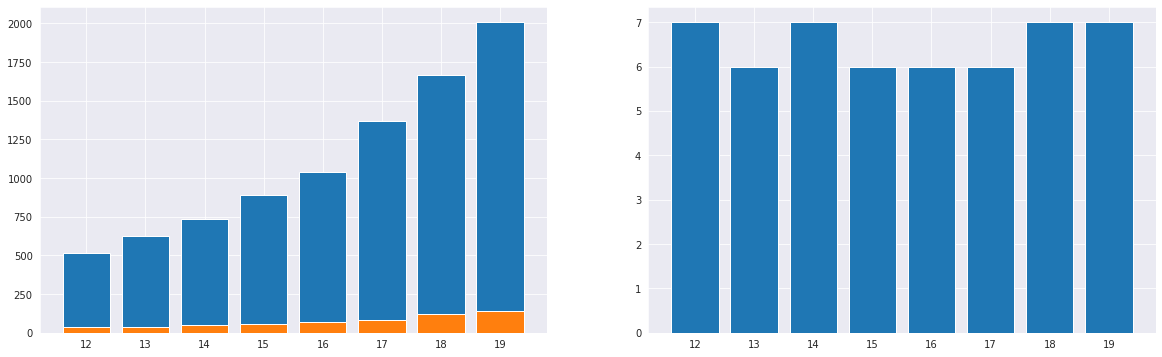

In [43]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

# Test realizados
ax1.bar([str(k) for k in range(12, len(data['casos']['dias'].keys())+1)], cant_tests)
ax1.bar([str(k) for k in range(12, len(data['casos']['dias'].keys())+1)], detected_acc)

# Proporción entre casos confirmados y test realizados
ax2.bar([str(k) for k in range(12, len(data['casos']['dias'].keys())+1)], prop_test_vs_detected) 

plt.show()

#### Evolución de casos por días

In [44]:
diagnosticados_acc = []

for i, _ in enumerate(diagnosticados):
    diagnosticados_acc.append(sum(diagnosticados[:i+1]))

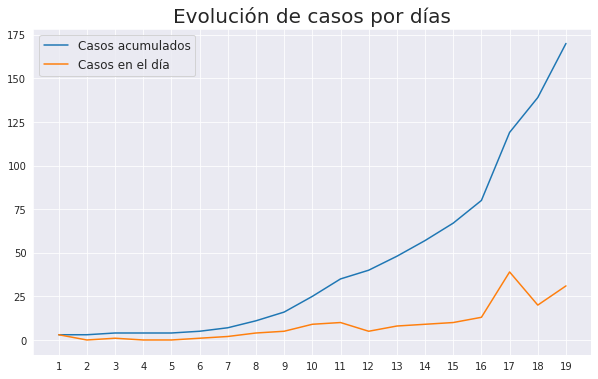

In [45]:
plt.figure(figsize=(10, 6))
plt.plot([str(i) for i in range(1,len(diagnosticados)+1)], diagnosticados_acc, label='Casos acumulados')
plt.plot([str(i) for i in range(1,len(diagnosticados)+1)], diagnosticados, label='Casos en el día')
plt.title('Evolución de casos por días', fontsize=20)
plt.legend(frameon=True, fontsize=12)
plt.show()

#### Casos detectados por provincias

In [46]:
locations = defaultdict(int)

for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            locations[caso['provincia_detección']] += 1
    except:
        pass
    
locations = sorted(dict(locations).items(), key=lambda kv: kv[1])

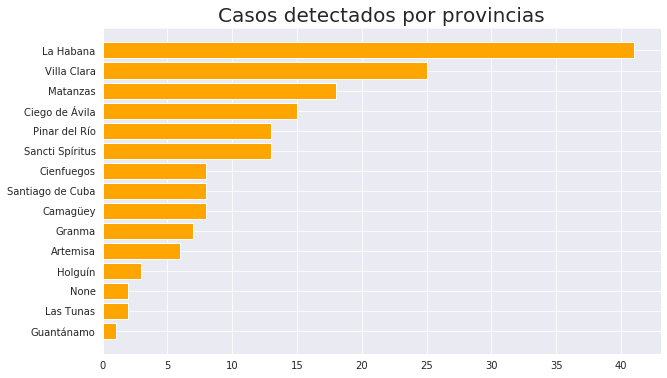

In [47]:
# Casos detectados por provincias
plt.figure(figsize=(10, 6))
plt.barh([str(l[0]) for l in locations], [l[1] for l in locations], color='orange')
plt.title('Casos detectados por provincias',fontsize = 20)
plt.show()

In [48]:
mlocations = defaultdict(int)

for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            mlocations[caso['municipio_detección']] += 1
    except:
        pass
    
mlocations = sorted(dict(mlocations).items(), key=lambda kv: kv[1])

municipios_top10 = mlocations[-10:]

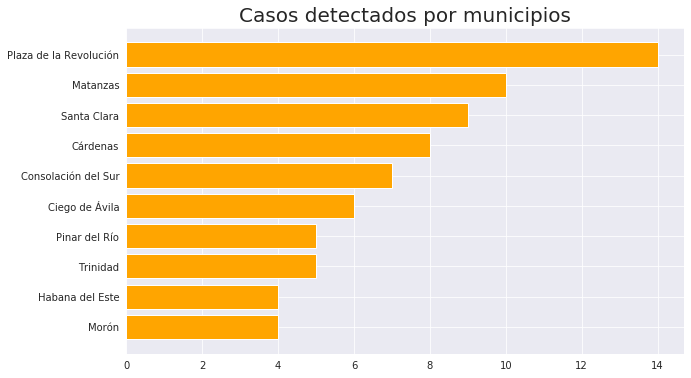

In [49]:
# Casos detectados por provincias
plt.figure(figsize=(10, 6))
plt.barh([str(l[0]) for l in municipios_top10], [l[1] for l in municipios_top10], color='orange')
plt.title('Casos detectados por municipios',fontsize = 20)
plt.show()